In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, roc_auc_score, roc_curve, classification_report, auc, confusion_matrix, ConfusionMatrixDisplay
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
tc_prep = pd.read_csv('tc_prep.csv')

In [4]:
tc_prep.head().T

,0,1,2,3,4
Survived,0.00,1.0000,1.000,1.0,0.00
Fare,7.25,71.2833,7.925,53.1,8.05
Family,1.00,1.0000,0.000,1.0,0.00
Sex_female,0.00,1.0000,1.000,1.0,0.00
Sex_male,1.00,0.0000,0.000,0.0,1.00
Embarked_C,0.00,1.0000,0.000,0.0,0.00
Embarked_Q,0.00,0.0000,0.000,0.0,0.00
Embarked_S,1.00,0.0000,1.000,1.0,1.00
Pclass_1,0.00,1.0000,0.000,1.0,0.00
Pclass_2,0.00,0.0000,0.000,0.0,0.00


In [5]:
scaler = StandardScaler()
tc_prep['Fare'] = scaler.fit_transform(tc_prep['Fare'].to_numpy().reshape(-1, 1))

In [6]:
tc_prep.head().T

,0,1,2,3,4
Survived,0.000000,1.000000,1.000000,1.00000,0.000000
Fare,-0.502445,0.786845,-0.488854,0.42073,-0.486337
Family,1.000000,1.000000,0.000000,1.00000,0.000000
Sex_female,0.000000,1.000000,1.000000,1.00000,0.000000
Sex_male,1.000000,0.000000,0.000000,0.00000,1.000000
Embarked_C,0.000000,1.000000,0.000000,0.00000,0.000000
Embarked_Q,0.000000,0.000000,0.000000,0.00000,0.000000
Embarked_S,1.000000,0.000000,1.000000,1.00000,1.000000
Pclass_1,0.000000,1.000000,0.000000,1.00000,0.000000
Pclass_2,0.000000,0.000000,0.000000,0.00000,0.000000


In [7]:
X_train, X_test = train_test_split(tc_prep, test_size=0.2, random_state=0)

y_train = X_train['Survived']
y_test = X_test['Survived']

del X_train['Survived']
del X_test['Survived']

best precision score = 0.896
best params: {'C': 0.1, 'gamma': 10, 'kernel': 'rbf'}
accuracy = 0.693
f1_score = 0.396
roc_auc_score = 0.612


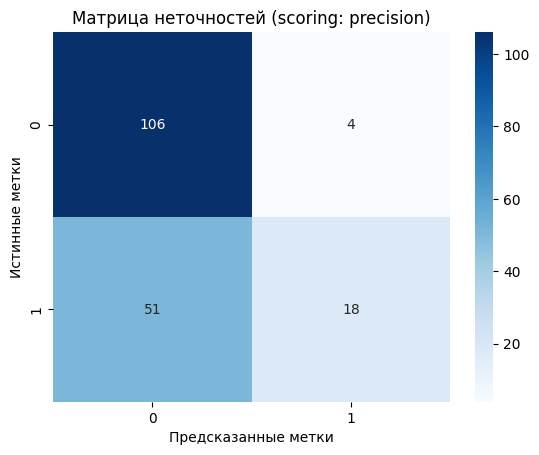

In [8]:
svm_kernel = SVC()
param_range = [0.001, 0.01, 0.1, 1, 10, 100, 1000]
param_grid = [{'C': param_range,
               'gamma': ['scale', 'auto', 0.001, 0.01, 0.1, 1, 10, 100, 1000],
               'kernel': ['rbf']}]
gs = GridSearchCV(estimator=svm_kernel,
                  param_grid=param_grid,
                  scoring='precision',
                  cv=5,
                  n_jobs=-1)
gs = gs.fit(X_train, y_train)
print(f'best precision score = {gs.best_score_:.3f}')
print(f'best params: {gs.best_params_}')

clf = gs.best_estimator_
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

skp_accuracy = clf.score(X_test, y_test)
skp_f1_score = f1_score(y_test, y_pred)
skp_roc = roc_auc_score(y_test, y_pred)

print(f'accuracy = {skp_accuracy:.3f}')
print(f'f1_score = {skp_f1_score:.3f}')
print(f'roc_auc_score = {skp_roc:.3f}')

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Предсказанные метки')
plt.ylabel('Истинные метки')
plt.title('Матрица неточностей (scoring: precision)')
plt.show()

best recall score = 0.678
best params: {'C': 10, 'gamma': 100, 'kernel': 'rbf'}
accuracy = 0.838
f1_score = 0.782
roc_auc_score = 0.612


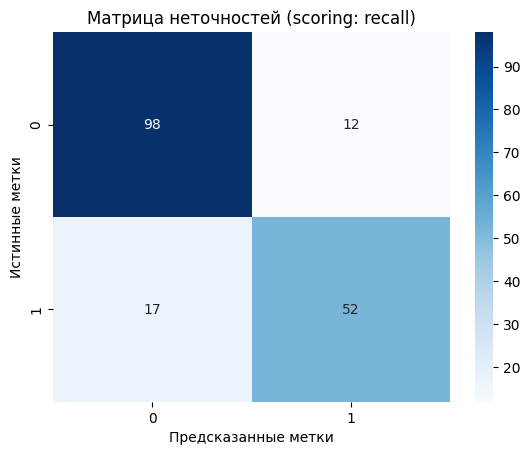

In [9]:
svm_kernel = SVC()
param_range = [0.001, 0.01, 0.1, 1, 10, 100, 1000]
param_grid = [{'C': param_range,
               'gamma': ['scale', 'auto', 0.001, 0.01, 0.1, 1, 10, 100, 1000],
               'kernel': ['rbf']}]
gs = GridSearchCV(estimator=svm_kernel,
                  param_grid=param_grid,
                  scoring='recall',
                  cv=5,
                  n_jobs=-1)
gs = gs.fit(X_train, y_train)
print(f'best recall score = {gs.best_score_:.3f}')
print(f'best params: {gs.best_params_}')

clf = gs.best_estimator_
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

skr_accuracy = clf.score(X_test, y_test)
skr_f1_score = f1_score(y_test, y_pred)
skr_roc = roc_auc_score(y_test, y_pred)

print(f'accuracy = {skr_accuracy:.3f}')
print(f'f1_score = {skr_f1_score:.3f}')
print(f'roc_auc_score = {skp_roc:.3f}')

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Предсказанные метки')
plt.ylabel('Истинные метки')
plt.title('Матрица неточностей (scoring: recall)')
plt.show()

best precision score = 0.745
best params: {'C': 0.01, 'class_weight': 'balanced', 'kernel': 'linear'}
accuracy = 0.788
f1_score = 0.721
roc_auc_score = 0.773


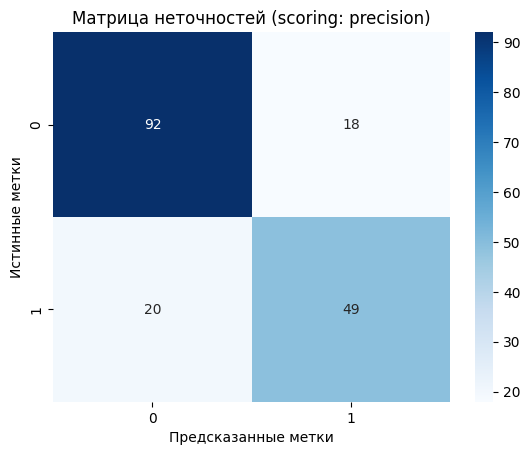

In [10]:
# долгое выполнение кода

svm_linear = SVC()
param_range = [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000]
param_grid = [{'C': param_range,
               'kernel': ['linear'],
               'class_weight': ['balanced']}]
gs = GridSearchCV(estimator=svm_linear,
                  param_grid=param_grid,
                  scoring='precision',
                  cv=5,
                  n_jobs=-1)
gs = gs.fit(X_train, y_train)
print(f'best precision score = {gs.best_score_:.3f}')
print(f'best params: {gs.best_params_}')

clf = gs.best_estimator_
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

slp_accuracy = clf.score(X_test, y_test)
slp_f1_score = f1_score(y_test, y_pred)
slp_roc = roc_auc_score(y_test, y_pred)

print(f'accuracy = {slp_accuracy:.3f}')
print(f'f1_score = {slp_f1_score:.3f}')
print(f'roc_auc_score = {slp_roc:.3f}')

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Предсказанные метки')
plt.ylabel('Истинные метки')
plt.title('Матрица неточностей (scoring: precision)')
plt.show()

best recall score = 0.674
best params: {'C': 0.01, 'class_weight': 'balanced', 'kernel': 'linear'}
accuracy = 0.788
f1_score = 0.721
roc_auc_score = 0.773


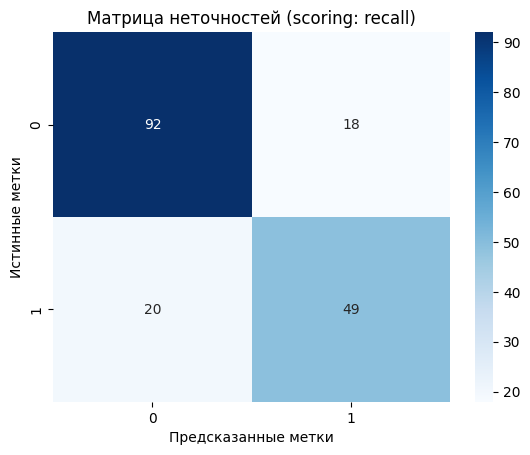

In [11]:
# долгое выполнение кода

svm_linear = SVC()
param_range = [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000]
param_grid = [{'C': param_range,
               'kernel': ['linear'],
               'class_weight': ['balanced']}]
gs = GridSearchCV(estimator=svm_linear,
                  param_grid=param_grid,
                  scoring='recall',
                  cv=5,
                  n_jobs=-1)
gs = gs.fit(X_train, y_train)
print(f'best recall score = {gs.best_score_:.3f}')
print(f'best params: {gs.best_params_}')

clf = gs.best_estimator_
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

slr_accuracy = clf.score(X_test, y_test)
slr_f1_score = f1_score(y_test, y_pred)
slr_roc = roc_auc_score(y_test, y_pred)

print(f'accuracy = {slr_accuracy:.3f}')
print(f'f1_score = {slr_f1_score:.3f}')
print(f'roc_auc_score = {slr_roc:.3f}')

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Предсказанные метки')
plt.ylabel('Истинные метки')
plt.title('Матрица неточностей (scoring: recall)')
plt.show()

(0.6, 0.9)

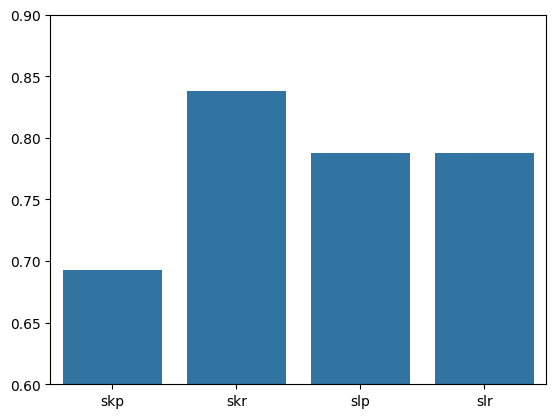

In [15]:
sns.barplot(x=['skp', 'skr', 'slp', 'slr'], y=[skp_accuracy, skr_accuracy, slp_accuracy, slr_accuracy])
plt.ylim(0.6, 0.9)

(0.3, 0.8)

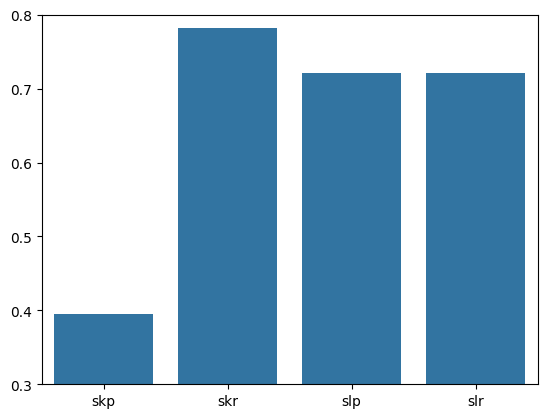

In [13]:
sns.barplot(x=['skp', 'skr', 'slp', 'slr'], y=[skp_f1_score, skr_f1_score, slp_f1_score, slr_f1_score])
plt.ylim(0.3, 0.8)

(0.5, 0.85)

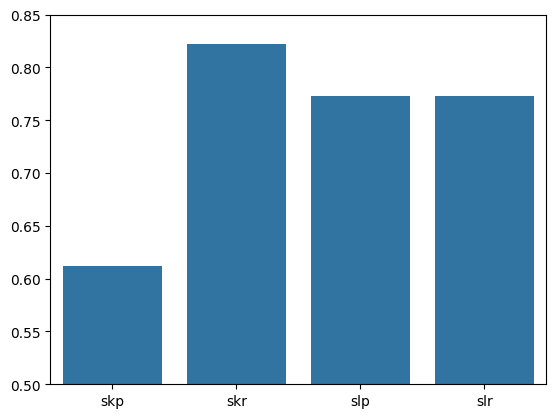

In [14]:
sns.barplot(x=['skp', 'skr', 'slp', 'slr'], y=[skp_roc, skr_roc, slp_roc, slr_roc])
plt.ylim(0.5, 0.85)